In [3]:
from tokenize import Special
import zipfile
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import math
import random
import scipy
import seaborn as sns
import sklearn.manifold
from math import floor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression



In [4]:
learn_data=pd.read_csv('learning2.csv')


In [5]:
learn_data.shape

(2756796, 54)

In [6]:
learn_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fips', 'date', 'PRECTOT', 'PS', 'QV2M',
       'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX',
       'WS50M_MIN', 'WS50M_RANGE', 'score', 'lat', 'lon', 'elevation',
       'slope1', 'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7',
       'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown',
       'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND',
       'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4',
       'SQ5', 'SQ6', 'SQ7'],
      dtype='object')

In [6]:
learn_data = learn_data[learn_data['date']>'2014-12-31']

In [7]:
learn_data.shape

(323232, 54)

In [9]:
learn_data.head()

,Unnamed: 0.1,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
783,5484,5484,1001,2015-01-06,0.00,101.26,3.79,3.75,-0.06,-0.04,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
784,5491,5491,1001,2015-01-13,0.02,100.98,5.08,6.38,4.11,4.12,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
785,5498,5498,1001,2015-01-20,0.00,100.11,6.57,10.13,7.62,7.62,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
786,5505,5505,1001,2015-01-27,0.00,100.20,4.61,5.33,2.62,2.63,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
787,5512,5512,1001,2015-02-03,0.00,101.17,3.01,1.41,-3.11,-3.06,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2


In [8]:
learn_data = learn_data.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'fips', 'date','aspectUnknown','CULT_LAND'])

In [9]:
learn_data.shape

(323232, 48)

In [12]:
learn_data.columns

Index(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND',
       'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4',
       'SQ5', 'SQ6', 'SQ7'],
      dtype='object')

In [10]:
learn_data['score'] = learn_data['score'].apply(np.floor)
y_train = learn_data['score']
learn_data=learn_data.drop(columns=['score'])

In [11]:
scaler = StandardScaler()
scaler.fit(learn_data)
normalized_train_set = scaler.transform(learn_data)

In [12]:
train_set_1 = pd.DataFrame(data=normalized_train_set)

In [43]:
train_set_1.columns

RangeIndex(start=0, stop=47, step=1)

In [13]:
train_set_1 = train_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])

In [46]:
train_set_1.shape

(323232, 25)

In [14]:
test_set = pd.read_csv('modeltesting.csv')
val_set = pd.read_csv('modelvalidation.csv')

In [15]:
test_set = test_set.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'fips', 'date','aspectUnknown','CULT_LAND'])

In [16]:
val_set = val_set.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'fips', 'date','aspectUnknown','CULT_LAND'])

In [17]:
scaler = StandardScaler()
scaler.fit(test_set)
normalized_test_set = scaler.transform(test_set)
test_set_1=pd.DataFrame(data=normalized_test_set)
test_set_1 = test_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
test_set_1.shape

(326340, 25)

In [18]:
scaler = StandardScaler()
scaler.fit(val_set)
normalized_val_set = scaler.transform(val_set)
val_set_1=pd.DataFrame(data=normalized_val_set)
val_set_1 = val_set_1.drop(columns=[4,5,6,7,11,12,14,15,16,17,20,24,25,26,27,28,37,41,43,44,45,46])
val_set_1.shape

(323232, 25)

In [19]:
y_test= pd.read_csv('modeltestingy.csv')
y_val=pd.read_csv('modelvalidationy.csv')

In [20]:
y_test = y_test.drop(columns=['Unnamed: 0'])
y_val = y_val.drop(columns=['Unnamed: 0'])

In [21]:
y_test = y_test.apply(np.floor)
y_val = y_val.apply(np.floor)

In [55]:
y_test.head()

,score
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [56]:
y_test.value_counts()

score
0.0      266217
1.0       34552
2.0       16698
3.0        6691
4.0        1957
5.0         225
dtype: int64

# start the modelling

 x_train -> train_set_1 ,
 y_train -> y_train

 x_test -> test_set_1 ,
 y_test -> y_test

 x_val -> val_set_1 ,
 y_val -> y_val

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

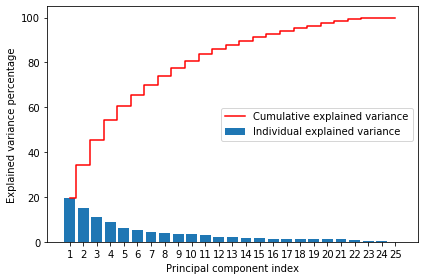

In [25]:
pca = PCA(n_components=None)
pca.fit(train_set_1)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 26), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 26), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=range(1,2))
plt.legend(loc='best')
plt.tight_layout()

plt.show()

### PCA to reduce the data into 4 Dimensions

In [52]:
from sklearn.neighbors import KNeighborsClassifier
pca = PCA(n_components = 8)
reduced_dataset = pca.fit_transform(train_set_1)
reduced_test = pca.fit_transform(test_set_1)
accuracy_score = []
for k in range(3,40):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(reduced_dataset, y_train)
    accuracy_score.append(classifier.score(reduced_test, y_test))
    print(k)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb

In [110]:
for k in range(3,40):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(reduced_dataset, y_train)
    accuracy_score.append(classifier.score(reduced_test, y_test))
    print(k)

30
31
32
33
34
35
36
37
38
39


In [78]:
classifier = KNeighborsClassifier(n_neighbors=39)
y_pred = classifier.fit(reduced_dataset, y_train).predict(reduced_dataset)

In [57]:
accuracy_score_perc

[71.9544033829748,
 74.12177483606055,
 73.72556229699086,
 75.18569589998162,
 74.87129987129987,
 75.8080529509101,
 75.73849359563646,
 76.34277134277134,
 76.35318992461849,
 76.76625605197034,
 76.75583747012318,
 77.06165349022493,
 77.11129496843783,
 77.34111662683091,
 77.39780596923454,
 77.56695470981185,
 77.59667831096402,
 77.78390635533493,
 77.8157749586321,
 77.95244223815652,
 78.003003003003,
 78.12526812526812,
 78.14794386222957,
 78.26162897591469,
 78.29778758350187,
 78.38879696022552,
 78.415762701477,
 78.50309493166637,
 78.51106208249065,
 78.57234785806214,
 78.62107004964147,
 78.68327511184654,
 78.70870870870871,
 78.76662376662377,
 78.7663173377459,
 78.84169884169884,
 78.86529386529386]

In [56]:
accuracy_score_perc = [i*100 for i in accuracy_score]

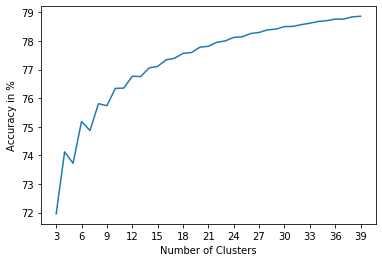

In [58]:
plt.plot(range(3,40), accuracy_score_perc )
plt.xticks(range(3,40,3))
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy in %")
plt.show()

In [116]:
max(accuracy_score)

0.8019795305509592

In [79]:
from sklearn.metrics import classification_report
classification_report(y_train, y_pred, zero_division=0, output_dict=True)

{'0.0': {'precision': 0.788378218780894,
  'recall': 0.9884083167312036,
  'f1-score': 0.8771336033882978,
  'support': 240431},
 '1.0': {'precision': 0.5417614559636009,
  'recall': 0.1399664147774979,
  'f1-score': 0.2224594648695536,
  'support': 47640},
 '2.0': {'precision': 0.5529790660225443,
  'recall': 0.09077931690811039,
  'f1-score': 0.15595621962850267,
  'support': 18914},
 '3.0': {'precision': 0.5144367629117528,
  'recall': 0.13556960668738613,
  'f1-score': 0.21458863443596266,
  'support': 9331},
 '4.0': {'precision': 0.6003086419753086,
  'recall': 0.3123243677238057,
  'f1-score': 0.4108793240031687,
  'support': 4982},
 '5.0': {'precision': 0.6686656671664168,
  'recall': 0.4612202688728025,
  'f1-score': 0.5458996328029376,
  'support': 1934},
 'accuracy': 0.7726400851400851,
 'macro avg': {'precision': 0.6110883021367529,
  'recall': 0.35471138195013435,
  'f1-score': 0.40448614652140386,
  'support': 323232},
 'weighted avg': {'precision': 0.7267327239441512,
  '

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.7726400851400851

After increasing the number of clusters, the **maximum accuracy score comes when the number of clusters=39**. <br>
The graph of accuracy vs number of clusters **starts to converge at an accuracy of 80** <br>
Here it can be concluded that the **maximum accuracy can't go more than 80%**

In [89]:
reduced_dataset.shape

(323232, 8)

### K Neighor Classifier

KNeighborsClassifier(n_jobs=-1, n_neighbors=8, p=1)

### Naive Bayes

In [39]:
pca = PCA(n_components = 8)
reduced_dataset = pca.fit_transform(train_set_1)
reduced_test = pca.fit_transform(test_set_1)

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(reduced_dataset, y_train).predict(reduced_dataset)

In [68]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='micro' ))
print(recall_score(y_test, y_pred, average='micro'))


0.8045780474351905
0.8045780474351903
0.8045780474351903


In [76]:
from sklearn.metrics import classification_report
classification_report(y_train, y_pred, zero_division=0, output_dict=True)

{'0.0': {'precision': 0.7462139793466913,
  'recall': 0.9869983487986158,
  'f1-score': 0.8498808293773938,
  'support': 240431},
 '1.0': {'precision': 0.3669064748201439,
  'recall': 0.0010705289672544081,
  'f1-score': 0.002134829109022793,
  'support': 47640},
 '2.0': {'precision': 0.1,
  'recall': 5.287088928835783e-05,
  'f1-score': 0.00010568590150073981,
  'support': 18914},
 '3.0': {'precision': 0.25,
  'recall': 0.00010716964955524595,
  'f1-score': 0.00021424745581146223,
  'support': 9331},
 '4.0': {'precision': 0.035856573705179286,
  'recall': 0.02890405459654757,
  'f1-score': 0.03200711269170927,
  'support': 4982},
 '5.0': {'precision': 0.2274024738344434,
  'recall': 0.12357807652533609,
  'f1-score': 0.16013400335008376,
  'support': 1934},
 'accuracy': 0.7355119542619543,
 'macro avg': {'precision': 0.2877299169510763,
  'recall': 0.19011850823776624,
  'f1-score': 0.17407945131425362,
  'support': 323232},
 'weighted avg': {'precision': 0.6241182233297786,
  'recall

In [48]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(reduced_dataset, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)